In [1]:
import pymongo
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import itertools

In [7]:
# Charger les données depuis MongoDB
def load_data():
    client = MongoClient("mongodb://localhost:27017/")
    db = client['so-scrapper']
    collection = db['questions']
    data = pd.DataFrame(list(collection.find()))
    data.drop_duplicates(subset=['_id'], inplace=True)
    return data

data = load_data()
data.head()

,_id,title,link,summary,tags,author,date,votes,answers,views
0,6698d4a86968908d30d8da52,Golang proto not generate method SendAndClose ...,https://stackoverflow.comNo link,Just start to looking how to configure grpc by...,"[go, protobuf-net]",Igor-Men,2024-07-18 08:36:51Z,0,0,2
1,6698d4a86968908d30d8da53,Consistency in event sourcing,https://stackoverflow.comNo link,How to maintain consistency when using Event S...,"[events, cqrs, event-sourcing, axon]",viktor nagla,2024-07-18 08:36:03Z,0,0,2
2,6698d4a86968908d30d8da54,How to dynamic import in Nuxt 3 without preloa...,https://stackoverflow.comNo link,I'm trying to dynamic import firebase-auth mod...,"[firebase-authentication, vite, nuxt3.js]",Andrew See,2024-07-18 08:35:32Z,0,0,3
3,6698d4a86968908d30d8da55,Same mobile same sim same file downloading but...,https://stackoverflow.comNo link,I have a OnePlus Nord CE2 mobile and my brothe...,"[performance, windows-10, wifi, android-wifi, ...",Eagle Bird,2024-07-18 08:35:29Z,-1,0,4
4,6698d4a86968908d30d8da56,How long does it take for Facebook Graph API d...,https://stackoverflow.comNo link,I use Facebook Graph API to get my ads insight...,"[facebook, facebook-graph-api]",user26418157,2024-07-18 08:34:51Z,0,0,2


In [8]:
# Exploration des données
def explore_data(data):
    print("Aperçu des données :")
    display(data.head())
    print("\nDescription des données :")
    display(data.describe())
    print("\nInformations sur les données :")
    data.info()

explore_data(data)

Aperçu des données :


,_id,title,link,summary,tags,author,date,votes,answers,views
0,6698d4a86968908d30d8da52,Golang proto not generate method SendAndClose ...,https://stackoverflow.comNo link,Just start to looking how to configure grpc by...,"[go, protobuf-net]",Igor-Men,2024-07-18 08:36:51Z,0,0,2
1,6698d4a86968908d30d8da53,Consistency in event sourcing,https://stackoverflow.comNo link,How to maintain consistency when using Event S...,"[events, cqrs, event-sourcing, axon]",viktor nagla,2024-07-18 08:36:03Z,0,0,2
2,6698d4a86968908d30d8da54,How to dynamic import in Nuxt 3 without preloa...,https://stackoverflow.comNo link,I'm trying to dynamic import firebase-auth mod...,"[firebase-authentication, vite, nuxt3.js]",Andrew See,2024-07-18 08:35:32Z,0,0,3
3,6698d4a86968908d30d8da55,Same mobile same sim same file downloading but...,https://stackoverflow.comNo link,I have a OnePlus Nord CE2 mobile and my brothe...,"[performance, windows-10, wifi, android-wifi, ...",Eagle Bird,2024-07-18 08:35:29Z,-1,0,4
4,6698d4a86968908d30d8da56,How long does it take for Facebook Graph API d...,https://stackoverflow.comNo link,I use Facebook Graph API to get my ads insight...,"[facebook, facebook-graph-api]",user26418157,2024-07-18 08:34:51Z,0,0,2



Description des données :


,_id,title,link,summary,tags,author,date,votes,answers,views
count,3750,3750,3750,3750,3750,3750,3750,3750,3750,3750
unique,3750,3743,1,3743,3454,3585,3689,17,7,100
top,6698d4a86968908d30d8e8f7,Struggling with a question on reference variab...,https://stackoverflow.comNo link,I am currently learning C++ on my own.\nThe qu...,[python],Alex,2024-07-17 12:19:57Z,0,0,13
freq,1,2,3750,2,15,7,2,2489,2550,167



Informations sur les données :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750 entries, 0 to 3749
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   _id      3750 non-null   object
 1   title    3750 non-null   object
 2   link     3750 non-null   object
 3   summary  3750 non-null   object
 4   tags     3750 non-null   object
 5   author   3750 non-null   object
 6   date     3750 non-null   object
 7   votes    3750 non-null   object
 8   answers  3750 non-null   object
 9   views    3750 non-null   object
dtypes: object(10)
memory usage: 293.1+ KB


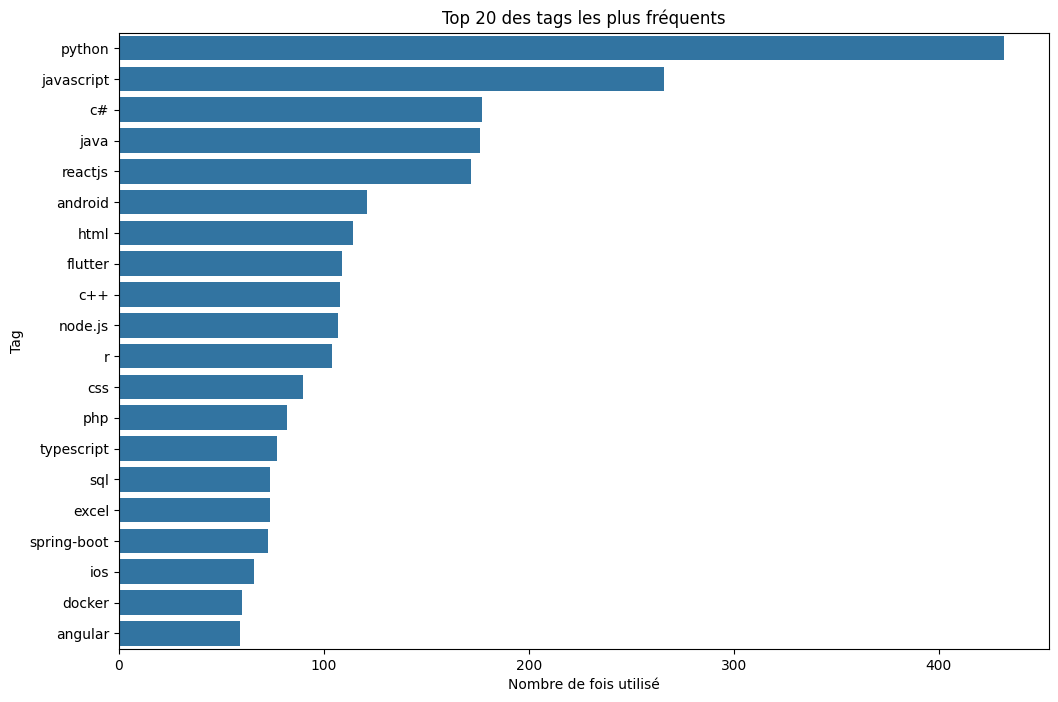

In [9]:
# Analyse des tags
def analyze_tags(data):
    tags = data['tags'].explode()
    tag_counts = tags.value_counts().reset_index()
    tag_counts.columns = ['tag', 'count']
    plt.figure(figsize=(12, 8))
    sns.barplot(x='count', y='tag', data=tag_counts.head(20))
    plt.title('Top 20 des tags les plus fréquents')
    plt.xlabel('Nombre de fois utilisé')
    plt.ylabel('Tag')
    plt.show()
    return tag_counts

tag_df = analyze_tags(data)

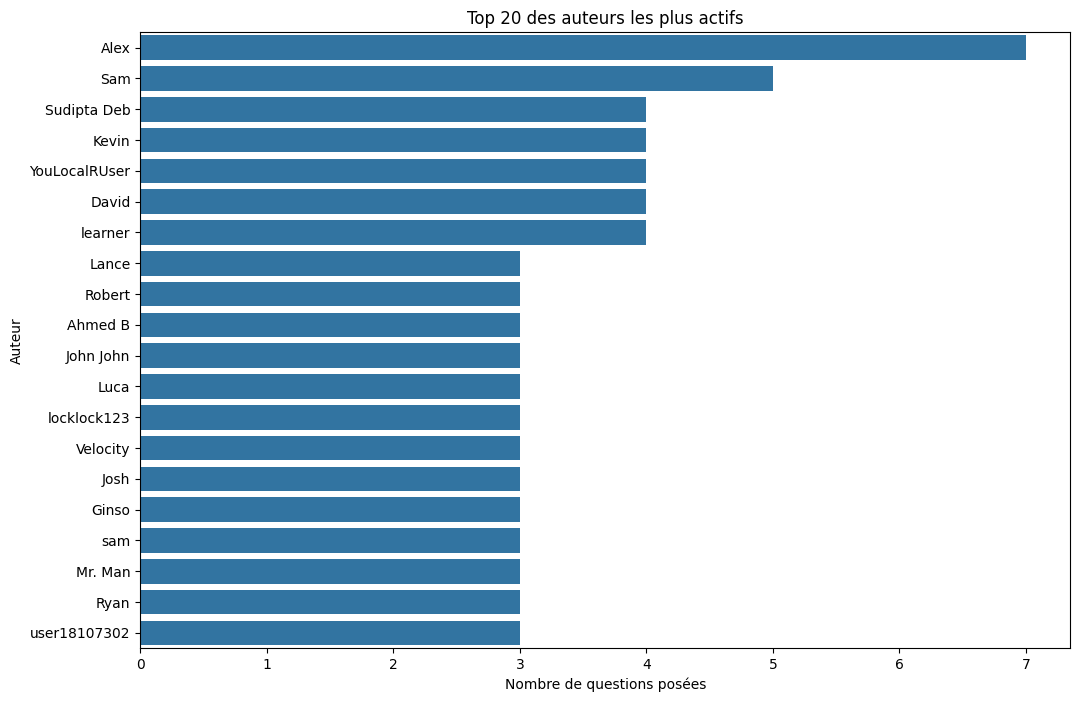

In [10]:
# Analyse des auteurs
def analyze_authors(data):
    author_counts = data['author'].value_counts().reset_index()
    author_counts.columns = ['author', 'count']
    plt.figure(figsize=(12, 8))
    sns.barplot(x='count', y='author', data=author_counts.head(20))
    plt.title('Top 20 des auteurs les plus actifs')
    plt.xlabel('Nombre de questions posées')
    plt.ylabel('Auteur')
    plt.show()
    
analyze_authors(data)

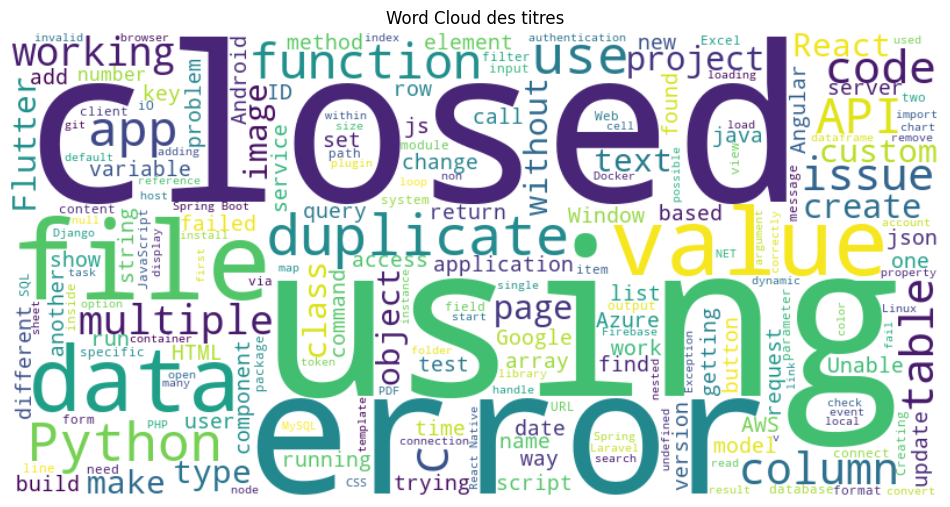

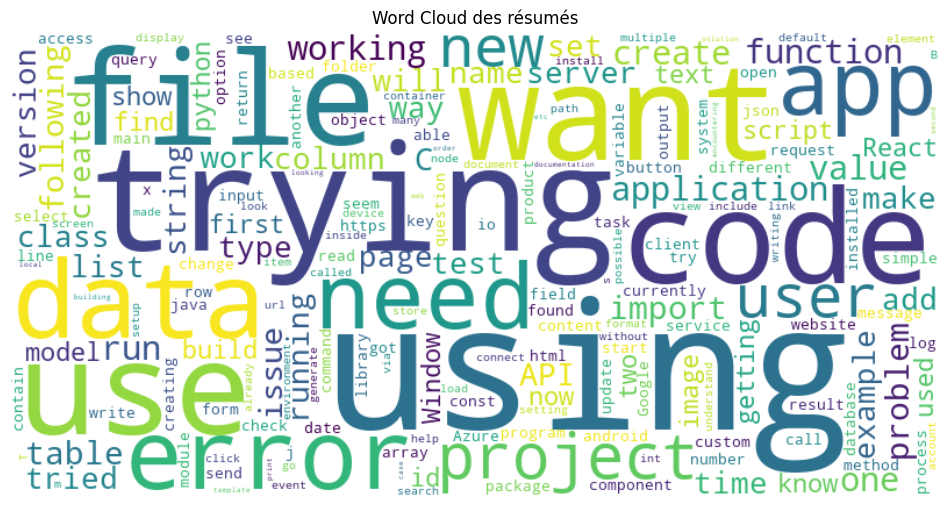

In [11]:
# Analyse des textes (titres et résumés)
def analyze_texts(data):
    from wordcloud import WordCloud

    text = ' '.join(data['title'].tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud des titres')
    plt.show()

    text = ' '.join(data['summary'].tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud des résumés')
    plt.show()

analyze_texts(data)

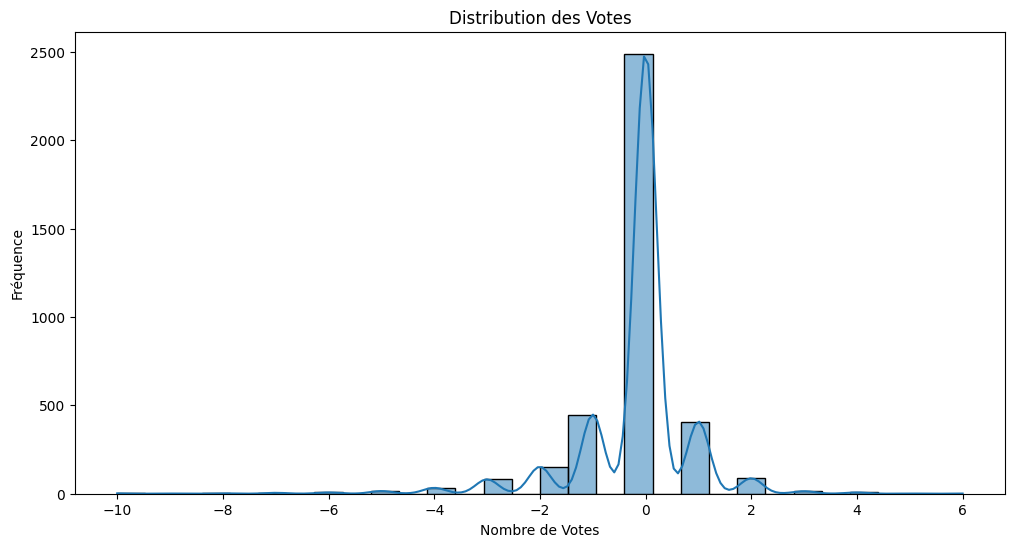

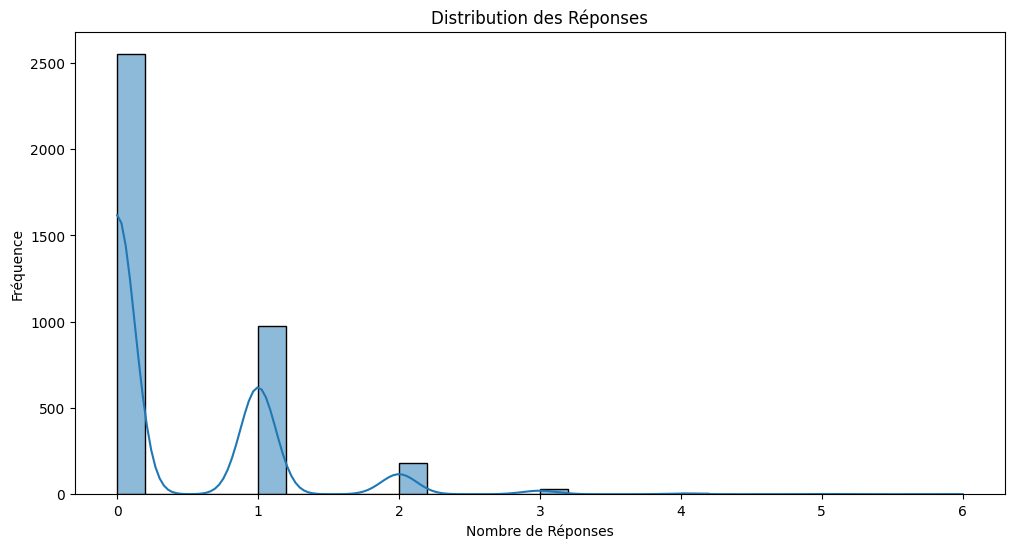

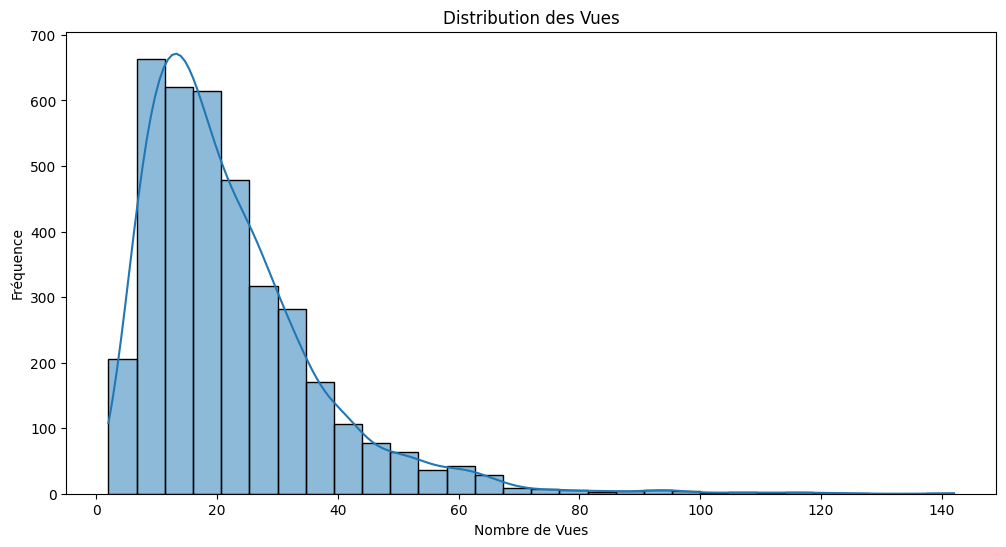

In [12]:
# Analyse des statistiques (votes, réponses, vues)
def analyze_stats(data):
    # Convertir les colonnes en entiers
    data['votes'] = data['votes'].astype(int)
    data['answers'] = data['answers'].astype(int)
    data['views'] = data['views'].astype(int)
    
    # Distribution des votes
    plt.figure(figsize=(12, 6))
    sns.histplot(data['votes'], kde=True, bins=30)
    plt.title('Distribution des Votes')
    plt.xlabel('Nombre de Votes')
    plt.ylabel('Fréquence')
    plt.show()

    # Distribution des réponses
    plt.figure(figsize=(12, 6))
    sns.histplot(data['answers'], kde=True, bins=30)
    plt.title('Distribution des Réponses')
    plt.xlabel('Nombre de Réponses')
    plt.ylabel('Fréquence')
    plt.show()

    # Distribution des vues
    plt.figure(figsize=(12, 6))
    sns.histplot(data['views'], kde=True, bins=30)
    plt.title('Distribution des Vues')
    plt.xlabel('Nombre de Vues')
    plt.ylabel('Fréquence')
    plt.show()

analyze_stats(data)
